# Comparison Barplot

Compare the accuracies for $h_{1,1}$ and $h_{2,1}$ for different algorithms and different training ratios.

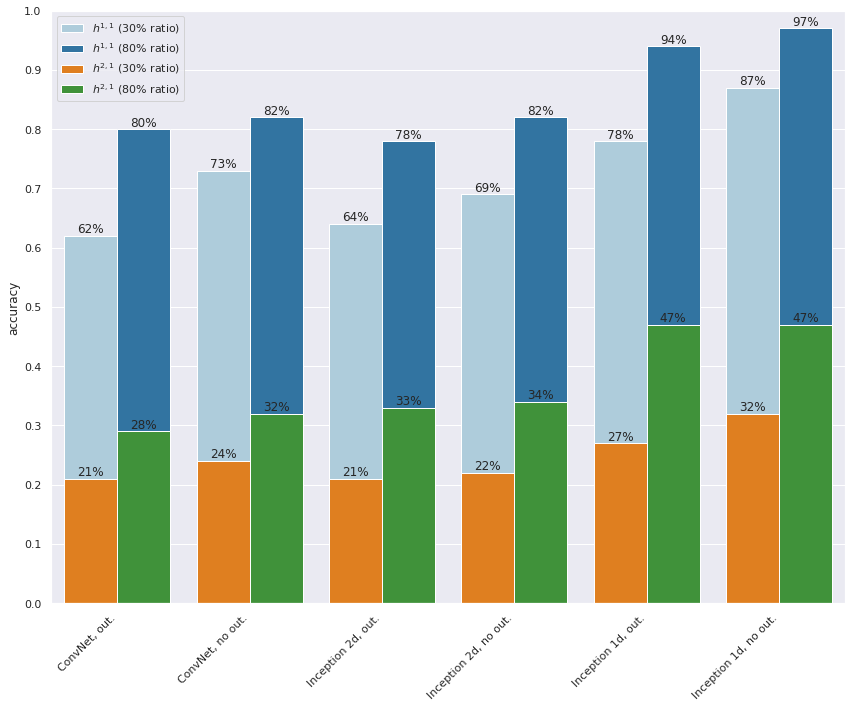

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set()

data = [('convnet_out', '30', 0.62, 0.21),
        ('convnet_noout', '30', 0.73, 0.24),
        ('convnet_out', '80', 0.80, 0.29),
        ('convnet_noout', '80', 0.82, 0.32),
        ('inc_2d_out', '30', 0.64, 0.21),
        ('inc_2d_noout', '30', 0.69, 0.22),
        ('inc_2d_out', '80', 0.78, 0.33),
        ('inc_2d_noout', '80', 0.82, 0.34),
        ('inc_1d_out', '30', 0.78, 0.27),
        ('inc_1d_noout', '30', 0.87, 0.32),
        ('inc_1d_out', '80', 0.94, 0.47),
        ('inc_1d_noout', '80', 0.97, 0.47)
       ]
data = pd.DataFrame(data, columns=('id', 'percentage', 'h11_acc', 'h21_acc'))

labels =['ConvNet, out.',
         'ConvNet, no out.',
         'Inception 2d, out.',
         'Inception 2d, no out.',
         'Inception 1d, out.',
         'Inception 1d, no out.'
        ]

_, ax = plt.subplots(1, 1, figsize=(12,10))

acc_plt = sns.barplot(data=data,
                      x='id',
                      y='h11_acc',
                      hue='percentage',
                      palette=sns.color_palette('Paired', 2),
                      orient='v',
                      ax=ax
                     )
acc_plt = sns.barplot(data=data,
                      x='id',
                      y='h21_acc',
                      hue='percentage',
                      palette=sns.color_palette('Paired_r', 2),
                      orient='v',
                      ax=ax
                     )
ax.set(title='',
       xlabel='',
       ylabel='accuracy',
       ylim=[0.0, 1.0],
       yticks=np.arange(0.0, 1.0 + 0.1, 0.1)
      )
ax.set_xticklabels(labels,
                   rotation=45,
                   va='top',
                   ha='right'
                  )
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles,
          ['$h^{1,1}$ (30% ratio)',
           '$h^{1,1}$ (80% ratio)',
           '$h^{2,1}$ (30% ratio)',
           '$h^{2,1}$ (80% ratio)'
          ],
          loc='best',
         )

for p in acc_plt.patches:
    acc_plt.annotate('{:d}%'.format(int(p.get_height() * 100)),
                     xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center',
                     va='bottom'
                    )
    
plt.tight_layout()
plt.savefig('./img/alg_comp.pdf', dpi=150, format='pdf')